In [3]:
#read csv for initial exploration
import pandas
dataset = pandas.read_csv("/Users/ipsit/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
dataset.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2498,1134-YWTYF,Male,0,Yes,No,27,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,53.80,1389.85,No
5579,2225-ZRGSG,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),93.90,6579.05,Yes
149,3466-BYAVD,Male,0,Yes,Yes,15,Yes,No,DSL,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.50,1071.4,No
891,3804-RVTGV,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.85,5017.9,Yes
6414,3472-QPRCH,Male,0,Yes,Yes,40,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.25,1006.9,No
493,5756-OZRIO,Male,1,Yes,No,61,Yes,Yes,DSL,No,...,No,No,No,Yes,One year,No,Bank transfer (automatic),64.05,3902.6,No
3685,7244-QWYHG,Male,0,Yes,No,50,No,No phone service,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),44.45,2188.45,No
6905,4459-BBGHE,Male,0,No,Yes,30,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.50,1307.8,No
3890,3886-CERTZ,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,109.25,8109.8,Yes
579,2640-LYMOV,Male,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.65,38.8,No


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
#convert any features with numbers into numeric values
dataset['TotalCharges'] = pandas.to_numeric(dataset['TotalCharges'],errors='coerce')

In [7]:
#Drop customerID as it is neither a feature nor the target variable.
dataset.drop(['customerID'],axis =1, inplace = True)

In [8]:
#Since only 11 records contain missing TotalCharges data, we can drop these
dataset.dropna()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [9]:
#Look through categorical features
hot_df = dataset.select_dtypes(include=[object])
hot_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [10]:
#Separate out categorical features into a list
columns = list(dataset)
categorical =[]
for i in columns:
    if dataset[i].dtype =='object':
      categorical.append(i)
print(categorical)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [11]:
#Encode categorical features. Check that all features are still represented.
new_df = pandas.get_dummies(dataset, columns = categorical, drop_first=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
SeniorCitizen                            7043 non-null int64
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
gender_Male                              7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                       7043 non-null uint8
OnlineBackup_No internet service   

In [45]:
#Understand proportion of target values within dataset
new_df.groupby('Churn_Yes').count()/7043

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn_Yes,,,,,,,,,,,,,,,,,,,,,
0,0.733068,0.733068,0.733068,0.733068,0.733068,0.733068,0.733068,0.733068,0.733068,0.733068,...,0.733068,0.733068,0.733068,0.733068,0.733068,0.733068,0.733068,0.733068,0.733068,0.733068
1,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,...,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370


In [13]:
#Observe any differences in mean between the 2 target variable segments
dataset.groupby(['Churn']).mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128721,37.569965,61.265124,2555.344141
Yes,0.254682,17.979133,74.441332,1531.796094


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AF52FD1978>,
      dtype=object)

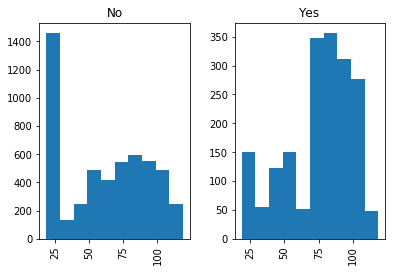

In [14]:
#Plot Monthly Charges against churn
dataset.hist(column ='MonthlyCharges', by='Churn')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AF53510C88>,
      dtype=object)

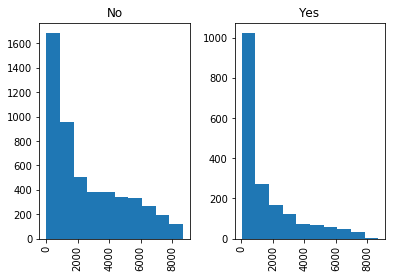

In [43]:
#Plot TotalCharges against Churn
dataset.hist(column ='TotalCharges', by='Churn')
#Does not show the same relationship as in the previous graph. A feature that might be correlated with TotalCharges is tenure.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AF535F8978>,
      dtype=object)

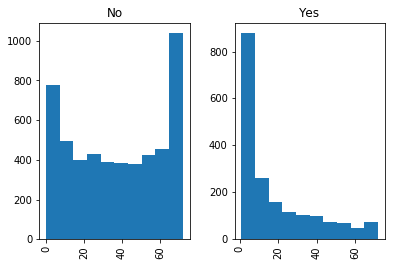

In [44]:
#Plot tenure against Churn
dataset.hist(column ='tenure', by='Churn')

In [22]:
#Remove any infinity or NaN values. Ensure all features are float32 datatype because Decision Tree models accepts that.
def clean_dataset(df):
    assert isinstance(df, pandas.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype('float32')

clean_dataset(new_df)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,1.0,29.850000,29.850000,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,34.0,56.950001,1889.500000,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,2.0,53.849998,108.150002,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,45.0,42.299999,1840.750000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,70.699997,151.649994,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,0.0,8.0,99.650002,820.500000,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
6,0.0,22.0,89.099998,1949.400024,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,0.0,10.0,29.750000,301.899994,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,28.0,104.800003,3046.050049,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
9,0.0,62.0,56.150002,3487.949951,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Balance dataset.  

In [19]:
#set up training and test set
import numpy as np
from sklearn.model_selection import train_test_split
target = new_df.Churn_Yes
features = new_df[['SeniorCitizen','tenure', 'MonthlyCharges','TotalCharges','gender_Male','Partner_Yes','Dependents_Yes','PhoneService_Yes','MultipleLines_No phone service','MultipleLines_Yes','InternetService_Fiber optic','InternetService_No','OnlineSecurity_No internet service','OnlineSecurity_Yes','OnlineBackup_No internet service','OnlineBackup_Yes','DeviceProtection_No internet service','DeviceProtection_Yes','TechSupport_No internet service','TechSupport_Yes','StreamingTV_No internet service','StreamingTV_Yes','StreamingMovies_No internet service','StreamingMovies_Yes','Contract_One year','Contract_Two year','PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']]
X_train, X_test, y_train, y_test = train_test_split(features, target)

#check if number of records in target and features of training/test match
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5274, 30)
(5274,)
(1758, 30)
(1758,)


In [20]:
#Build decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy")
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
#Test decision Tree on test data
from sklearn import metrics
predTree = tree.predict(X_test)
print("DecisionTrees's Accuracy: "), metrics.accuracy_score(y_test,predTree)

DecisionTrees's Accuracy: 


(None, 0.7235494880546075)

In [41]:
#Plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

roc_auc_score(y_test, predTree)

fpr, tpr= metrics.roc_curve(y_test, predTree, pos_label=2)

C:\Users\ipsit\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


ValueError: too many values to unpack (expected 2)

In [37]:
#Use logistic regression to predict churn
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
logit = LogisticRegression(solver='liblinear').fit(X_train, y_train)
logit.score(X_test, y_test)

0.7997724687144482